In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
categorical_attributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
target_variable = ['class']

a) Učitati podatke iz datoteke `car.csv` za problem klasifikacije. Prikazati referentne statistike za atribute
koristeći `pandas` metod `describe`.

In [3]:
df = pd.read_csv('./car.csv')

In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,med,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


b) Kategoričke atribute enkodirati koristeći *dummy* enkodiranje.

In [6]:
X = df.drop(axis=1, columns='class')

In [7]:
X = pd.get_dummies(X, columns=categorical_attributes)

c) Učitane podatke razdvojiti u dva podskupa, $X$ gde se nalaze svi atributi bez ciljne promenljive `class`, i $y$ gde se
nalazi ciljna promenljiva `class`. Dozvoljeno je koristiti sve dostupne bibliotečke funkcije.

In [8]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [9]:
y = df[['class']]

In [10]:
y['class'] = y['class'].map({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})

/home/nemanjam/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
y = to_categorical(y, 4)

d) Podeliti podatke na skup za obučavanje i validaciju u razmeri 3:1. 

In [12]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.25)

In [13]:
X_train.shape

(1296, 21)

e) Napraviti potpuno povezano neuronsku mrežu koja ima jedan skriveni sloj sa 32 neurona.

In [14]:
model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


f) Izvršiti obučavanje prethodno definisane mreže na 10 epoha sa veličinom podskupa 32. Kao grešku koristiti kategoričku kros entropiju, ostale parametre odabrati proizvoljno. Postaviti i podatke za validaciju.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), shuffle=True)


Train on 1296 samples, validate on 432 samples
Epoch 1/10
1296/1296 [==============================] - 0s 251us/step - loss: 1.2705 - accuracy: 0.4367 - val_loss: 1.0124 - val_accuracy: 0.7153
Epoch 2/10
1296/1296 [==============================] - 0s 73us/step - loss: 0.8866 - accuracy: 0.7083 - val_loss: 0.7542 - val_accuracy: 0.7338
Epoch 3/10
1296/1296 [==============================] - 0s 74us/step - loss: 0.7198 - accuracy: 0.7068 - val_loss: 0.6580 - val_accuracy: 0.7384
Epoch 4/10
1296/1296 [==============================] - 0s 69us/step - loss: 0.6343 - accuracy: 0.7168 - val_loss: 0.5914 - val_accuracy: 0.7546
Epoch 5/10
1296/1296 [==============================] - 0s 69us/step - loss: 0.5627 - accuracy: 0.7562 - val_loss: 0.5309 - val_accuracy: 0.8056
Epoch 6/10
1296/1296 [==============================] - 0s 67us/step - loss: 0.4984 - accuracy: 0.8110 - val_loss: 0.4749 - val_accuracy: 0.8218
Epoch 7/10
1296/1296 [==============================] - 0s 68us/step - loss: 0.44

g) Nacrtati na istoj slici kako se menjala tačnost kroz epohe na skupovima za obučavanje i validaciju. Označiti u legendi šta označava koja linija.

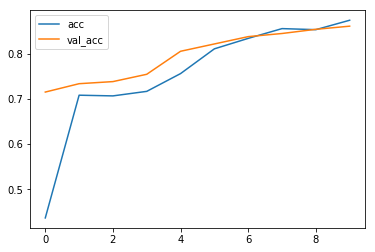

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

h) Testirati nekoliko verzija prethodne arhitekture tako što im se varira veličina skrivenog sloja (1, 2, 3, 10, 32, 64).
Obučiti svaki mrežu nad podacima za obučavanje i nacrtati kako se menjala tačnost kroz epohe nad skupovima za obučavanje i validaciju.
Koristiti iste parametre pri obučavanju kao u delu (e).

In [19]:
def build_network(layer_size):
    model = Sequential()
    model.add(Dense(layer_size, input_dim=21, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    return model

In [20]:
layer_sizes = [1, 2, 3, 10, 32, 64]
histories = []
epochs = 10
batch_size = 32

for ls in layer_sizes:
    model = build_network(ls)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, verbose=0, epochs=epochs, validation_data=(X_val, y_val), shuffle=True)
    histories.append(history)
    print(f'Model with layer_size={ls} done!')

Model with layer_size=1 done!
Model with layer_size=2 done!
Model with layer_size=3 done!
Model with layer_size=10 done!
Model with layer_size=32 done!
Model with layer_size=64 done!


i) Nacrtati kako se menjala tačnost kroz epohe svih modela na skupu za obučavanje (1. slika) i skupu za validaciju (2. slika). Na slikama označiti koja linija označava koju verziju arhitekture.


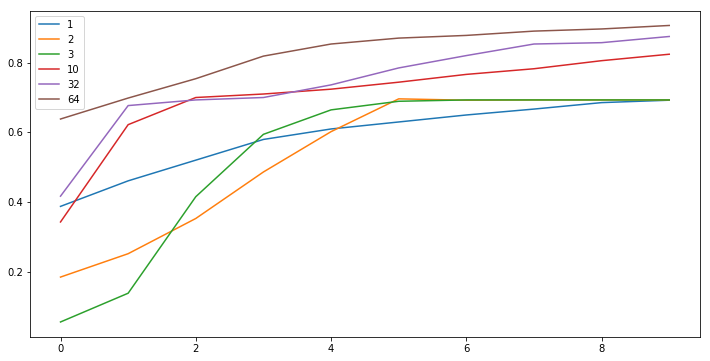

In [21]:
plt.figure(figsize=(12,6))
for hist in histories:
    plt.plot(hist.history['accuracy'])
    
plt.legend(layer_sizes)

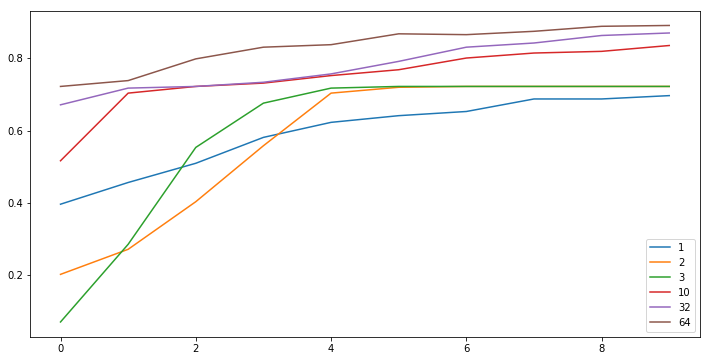

In [22]:
plt.figure(figsize=(12,6))
for hist in histories:
    plt.plot(hist.history['val_accuracy'])
    
plt.legend(layer_sizes)